In [12]:
import numpy as np
import math

# Вычислительные эксперименты, иллюстрирующие явление концентрации равномерной меры на поверхности евклидовой сферы в малой окрестности экватора

<i>Статья:</i>
<br/>
<i>Горбунов Э.А.</i>
<br/>
<i>МФТИ (Москва, Россия),</i>
<br/>
<i>Воронцова Е.А.</i>
<br/>
<i>ДВФУ (Владивосток, Россия),</i>
<br/>
<i>Усманова И.</i>
<br/>
<i>arxiv (in process)</i>

In [13]:
def montecarlo(f, X, N, q):
    """
    Function to compute the Monte Carlo estimate of the expectation
    E[f(X)], with N samples
   
    Inputs:
    f - a Python function that applies a chosen mathematical function to
    each entry in a numpy array
    X - a Python function that takes N as input and returns
    independent individually distributed random samples from a chosen
    probability distribution
    N - the number of samples to use
    q -- additional parametr for f
    """
    est = np.sum(f(X(N), q, N))/N
    return est

In [26]:
def func(e, q, n):
    # Inputs:  
    # e - a numpy array of values
    # q - norm
    # n - length of e
    norm_e = np.linalg.norm(e, q)
    sq = norm_e*norm_e
    return sq # / pow(n, 2./q - 1)

In [38]:
# Generating uniformly distributed numbers on a sphere
def get_rand_vec(dims):
    e = np.random.standard_normal(int(dims))
    return e / np.linalg.norm(e)

In [56]:
Nrange = range(10, int(1e3), 10)
Narr = np.array(Nrange)
qarr = np.array([2, 3, 5, 10, 50, 100, 1000, 1e4, 1e5])
#err=np.zeros(Ns.shape)

plt1 = []
plt2 = []
#for j, q in enumerate(qarr):
q = 5
for i, N in enumerate(Narr):
    n2q = pow(N, 2./q - 1)
    pract_estimate = montecarlo(func, get_rand_vec, N, q) 
    theor_estimate = min([q - 1, 16*math.log(N) - 8]) * n2q
    plt1.append(pract_estimate)
    plt2.append(theor_estimate)
    print('q = ', int(q), ', n = ', int(N), ', pract  = ', pract_estimate, ', from lemma = ', theor_estimate) 
        


q =  5 , n =  10 , pract  =  0.0382295686775 , from lemma =  1.0047545726
q =  5 , n =  20 , pract  =  0.0143674567888 , from lemma =  0.662890803468
q =  5 , n =  30 , pract  =  0.00775469741773 , from lemma =  0.519741312122
q =  5 , n =  40 , pract  =  0.00562433211555 , from lemma =  0.437344829577
q =  5 , n =  50 , pract  =  0.00392100860101 , from lemma =  0.382540999916
q =  5 , n =  60 , pract  =  0.00283900845795 , from lemma =  0.34290138645
q =  5 , n =  70 , pract  =  0.00192537999959 , from lemma =  0.312608776957
q =  5 , n =  80 , pract  =  0.00166962744808 , from lemma =  0.288539981181
q =  5 , n =  90 , pract  =  0.00159808865894 , from lemma =  0.268852751599
q =  5 , n =  100 , pract  =  0.00105531468336 , from lemma =  0.252382937792
q =  5 , n =  110 , pract  =  0.00114930987839 , from lemma =  0.238355062364
q =  5 , n =  120 , pract  =  0.000984755639208 , from lemma =  0.226230546018
q =  5 , n =  130 , pract  =  0.000873511917988 , from lemma =  0.21562245176

<IPython.core.display.Javascript object>


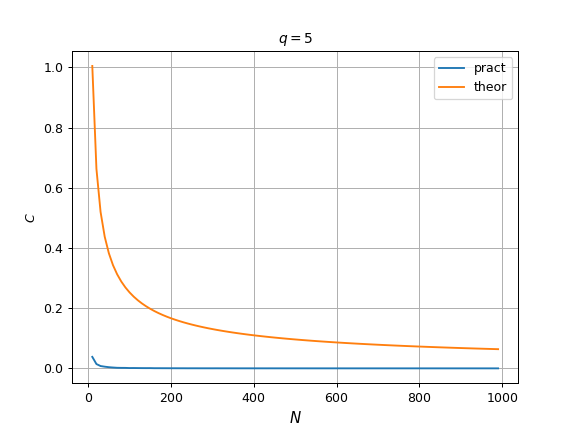

In [57]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(Nrange, plt1, label = 'pract')
plt.plot(range(10, int(1e3), 10), plt2, label = 'theor')
plt.xlabel(r"$N$", fontsize=12)
plt.ylabel(r"$C$", fontsize=10)
plt.title(r"$q = 5$", fontsize = 11);
plt.legend()